<a href="https://colab.research.google.com/github/atulm7348/My-codes-and-assingments/blob/main/hw_3_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best focus z: 6.30 mm




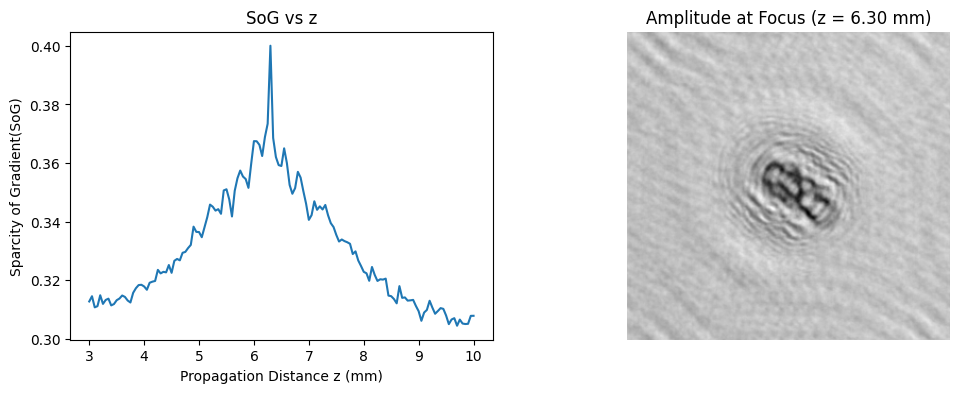

In [3]:
import numpy as np
import imageio.v3 as io
import matplotlib.pyplot as plt

lamda = 650e-9
p = 1.4e-6
z_min = 3e-3
z_max = 10e-3
step = .05e-3

z_vals = np.arange(z_min, z_max+step, step)

img = io.imread('/content/inline_holo.jpg')

img = img / np.sum(img[:])

y0, x0 = img.shape

fx0 = np.fft.fftshift(np.fft.fftfreq(x0, d=p))
fy0 = np.fft.fftshift(np.fft.fftfreq(y0, d=p))

fx, fy = np.meshgrid(fx0,fy0)

k = 2*np.pi/lamda
alpha = np.sqrt(k**2 - 4*(np.pi**2)*(fx**2 + fy**2))


def sparsity_of_grad(img):
    grad_x = np.diff(img, axis=1, append=img[:, -1:])
    grad_y = np.diff(img, axis=0, append=img[-1:, :])
    grad_mag = np.sqrt(grad_x**2 + grad_y**2).flatten()
    grad_mag_sort = np.sort(grad_mag)

    N = grad_mag_sort.size
    indx = np.arange(1, N+1)

    gini = 1 - 2 * np.sum(grad_mag_sort[indx-1]/np.sum(grad_mag_sort) * ((N - indx + 0.5)/N))
    return gini

SoG_list = []
amp_list =[]

for z in z_vals:
    H = np.exp(1j * z * alpha)
    U1 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(img)))
    U2 = U1 * H
    f = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(U2)))
    amp = np.abs(f)
    amp_list.append(amp)
    SoG_list.append(sparsity_of_grad(amp))

SoG = np.array(SoG_list)
i_focus = np.argmax(SoG)
z_focus = z_vals[i_focus]
amp_focus = amp_list[i_focus]


print(f'Best focus z: {z_focus*1e3:.2f} mm')
print('\n')

plt.figure(1, figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(z_vals*1e3, SoG)
#plt.axvline(z_focus*1e3, color='r', linestyle='--', label=f'Focus at {z_focus*1e3:.2f} mm')
plt.xlabel('Propagation Distance z (mm)')
plt.ylabel('Sparcity of Gradient(SoG)')
plt.title('SoG vs z')


plt.subplot(1,2,2)
plt.imshow((amp_focus), cmap='gray')
plt.title(f'Amplitude at Focus (z = {z_focus*1e3:.2f} mm)')
plt.axis('off')
plt.show()



